In [5]:

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

def ReadTable(Infile):return pd.read_table(Infile,sep='\t',index_col=0)

In [4]:
df = ReadTable('ATACseq_QNorm_All.log2.txt')
df=df.T
df.head()


3,merge_peak_1,merge_peak_2,merge_peak_3,merge_peak_4,merge_peak_5,merge_peak_6,merge_peak_7,merge_peak_8,merge_peak_9,merge_peak_10,...,merge_peak_169258,merge_peak_169259,merge_peak_169260,merge_peak_169261,merge_peak_169262,merge_peak_169263,merge_peak_169264,merge_peak_169265,merge_peak_169266,merge_peak_169267
HCB001,1.413196,0.000000,0.000000,0.000000,0.00000,0.000000,7.268315,0.000000,0.000000,2.359705,...,1.413196,2.359705,0.877143,0.000000,0.877143,5.828493,3.925418,0.000000,0.000000,0.000000
HCB002,2.863048,0.179706,0.085730,0.514573,0.00000,0.000000,7.462356,2.255655,0.304153,1.832373,...,1.832373,2.388105,0.179706,0.179706,3.751612,6.241716,3.602036,1.666061,0.000000,0.000000
HCB003,0.000000,0.000000,1.292181,2.509411,0.00000,0.000000,8.625336,2.333657,1.790432,0.742842,...,0.742842,4.166650,0.742842,2.068285,2.970253,6.336939,3.940838,1.292181,0.000000,0.000000
HCM001,5.018285,3.615311,0.113211,2.499032,0.38529,0.014647,7.945085,3.720681,2.025535,2.900990,...,3.797860,4.730695,1.274033,3.226068,2.240159,6.172581,2.633218,3.264873,0.071791,0.652077
HCM002,4.117458,0.000000,1.186190,3.007342,0.00000,0.140178,8.109964,4.283892,3.111508,2.749425,...,2.592304,4.959884,2.865070,2.267933,1.467439,5.559592,2.865070,3.007342,0.243271,1.904926


In [138]:
#Group:

CellType = []
for item in df['CellType']:
    CellType.append(item)
    
Disease = []
for item in df['Disease']:
    Disease.append(item)
    
TSS = []
for item in df['TSS']:
    TSS.append(item)
    
Reads = []
for item in df['FinalMappedReads']:
    Reads.append(item)



CellType_color = df.CellType.map({'B':'deepskyblue', 'Mono':'orange', 'T4':'#00a03e', 'T8':'m'})  
Disease_color = df.Disease.map({'HC':'limegreen', 'OA':'blue', 'RA':'red'})    
    
pc=[]
for i in range (1,11):
    pc.append("PC"+str(i))    
    

In [139]:
pc

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

In [140]:
df = df.drop(columns=['CellType'])
df = df.drop(columns=['Disease'])
df = df.drop(columns=['TSS'])
df = df.drop(columns=['FinalMappedReads'])
dfT=df.T
dfT.head()


,HCB001,HCB002,HCB003,HCM001,HCM002,HCM003,HCTA001,HCTA002,HCTA003,HCTA004,...,RATB024all,RATB031,RATB032,RATB033,RATB034,RATB045,RATB046,RATB048,RATB054,RATB055
3,,,,,,,,,,,,,,,,,,,,,
merge_peak_1,1.4131961524546763,2.86304842232868,0.0,5.01828535302775,4.117457581548177,5.062569347196967,2.5068236732248237,2.94179621055672,2.519716476105718,0.0,...,5.498055437770108,5.267168863485237,5.112359713908498,5.3993106261997275,5.410083540587341,5.186594341933815,5.217784640220905,5.882892542668281,5.177673770819981,5.777607578663552
merge_peak_2,0.0,0.1797060222348978,0.0,3.615310591590426,0.0,0.9777471931528721,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.7689944483588442,0.0,0.0,0.8851360429679973
merge_peak_3,0.0,0.08572987402588404,1.2921807514933106,0.11321061044799109,1.1861900558050966,0.26793320524663305,0.0,0.0,0.0,2.8052503337326806,...,1.1926450779423958,1.9852029980719195,0.0,1.0647702553902378,0.0,2.4885779642968138,1.7689944483588442,2.7362293374312228,0.0,0.0
merge_peak_4,0.0,0.5145731728297582,2.5094114677139796,2.49903232193398,3.0073419753411677,1.5094114677139794,2.0995356735509145,0.0,1.2244939439817357,2.8052503337326806,...,2.934112064343543,1.9852029980719195,0.0,2.493814612662961,2.429684275243245,0.5947435215137414,2.6236948952098706,0.0,1.6614145611590294,0.0
merge_peak_5,0.0,0.0,0.0,0.3852901558847919,0.0,0.26793320524663305,0.0,1.2556548754681962,0.0,0.0,...,0.2307802068291671,0.0,0.0,0.0,1.9009899941688342,0.0,0.0,0.0,0.0,0.0


In [141]:
#PC1-PC10

scaler = StandardScaler()
scaled_features = scaler.fit_transform(dfT)

pca=PCA(n_components=10)
pca.fit(dfT)
PC_ratio=pca.explained_variance_ratio_
PC_data=pd.DataFrame(np.transpose(pca.components_),index=dfT.columns,columns=pc)
PC_data.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
HCB001,0.092816,0.006111,0.129829,0.247591,-0.008736,-0.189814,0.099728,0.000724,-0.103256,0.007923
HCB002,0.095038,0.007525,0.124548,0.262459,0.008266,-0.136958,0.082586,0.032403,-0.101962,0.051024
HCB003,0.094337,-0.002723,0.103689,0.311703,0.063234,-0.057334,0.023714,-0.030153,-0.070579,0.005547
HCM001,0.097955,0.119970,0.049112,-0.061750,-0.122177,-0.223101,-0.133365,0.168356,-0.082756,0.087193
HCM002,0.095741,0.112287,0.045253,-0.070956,-0.144181,-0.270266,-0.151953,0.205374,-0.097442,0.115337


In [142]:
PC_ratio

array([0.70347368, 0.07193053, 0.03632206, 0.02077002, 0.0103507 ,
       0.00629464, 0.0041533 , 0.00344185, 0.00330061, 0.00294267])

In [ ]:
#c=C,cmap='RdPu'

In [143]:
def PlotPCA(a,b,Type,Name):
    plt.style.use('seaborn-white')
    fig=plt.figure(figsize=(3,3))
    ax=fig.add_axes([0.2,0.2,0.7,0.7])
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['top'].set_linewidth(0.5)
    ax.set_xlabel('PC{}({:.2f}%)'.format(a,pca_ratio[a-1]*100),fontsize=10)
    ax.set_ylabel('PC{}({:.2f}%)'.format(b,pca_ratio[b-1]*100),fontsize=10)
    ax.tick_params(axis='both',length=7,labelsize=8,direction='out')
    ax.scatter(PC_data['PC{}'.format(a)],PC_data['PC{}'.format(b)],s=60,c=Type,marker='o',alpha=0.65,edgecolors='none')
    outfig='{}_{}_vs_{}.pdf'.format((Name),str(a),str(b))
    plt.savefig(outfig)


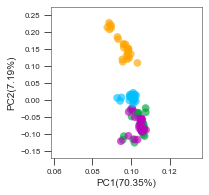

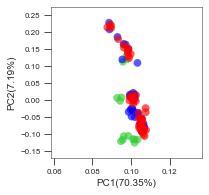

In [144]:
PlotPCA(1,2,CellType_color,'CellType')
PlotPCA(1,2,Disease_color,'Disease')

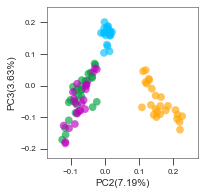

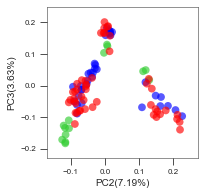

In [145]:
PlotPCA(2,3,CellType_color,'CellType')
PlotPCA(2,3,Disease_color,'Disease')

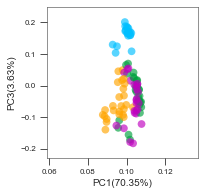

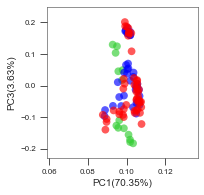

In [146]:
PlotPCA(1,3,CellType_color,'CellType')
PlotPCA(1,3,Disease_color,'Disease')

In [128]:
TSS_C=[]
for i in TSS:
    TSS_C.append(float(i))


Reads_C=[]
for i in Reads:
    Reads_C.append(float(i))


In [133]:
def PlotPCA_seq(a,b,C,Name):
    plt.style.use('seaborn-white')
    fig=plt.figure(figsize=(3,3))
    ax=fig.add_axes([0.2,0.2,0.7,0.7])
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['top'].set_linewidth(0.5)
    ax.set_xlabel('PC{}({:.2f}%)'.format(a,pca_ratio[a-1]*100),fontsize=10)
    ax.set_ylabel('PC{}({:.2f}%)'.format(b,pca_ratio[b-1]*100),fontsize=10)
    ax.tick_params(axis='both',length=7,labelsize=8,direction='out')
    ax.scatter(PC_data['PC{}'.format(a)],PC_data['PC{}'.format(b)],c=C,cmap='GnBu',s=60,marker='o',alpha=0.65,edgecolors='none')
    outfig='{}_{}_vs_{}.pdf'.format((Name),str(a),str(b))
    plt.savefig(outfig)


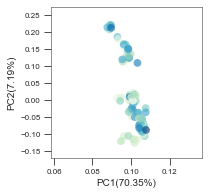

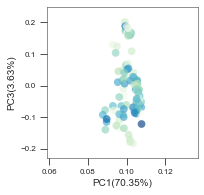

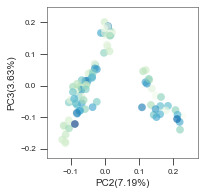

In [134]:
PlotPCA_seq(1,2,TSS_C,'TSS')
PlotPCA_seq(1,3,TSS_C,'TSS')
PlotPCA_seq(2,3,TSS_C,'TSS')

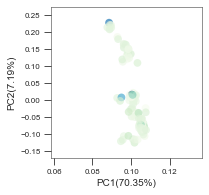

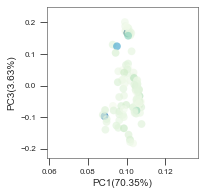

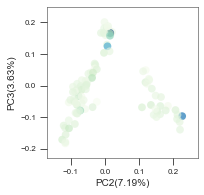

In [135]:
PlotPCA_seq(1,2,Reads_C,'Reads')
PlotPCA_seq(1,3,Reads_C,'Reads')
PlotPCA_seq(2,3,Reads_C,'Reads')

In [147]:
pc

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

<BarContainer object of 10 artists>

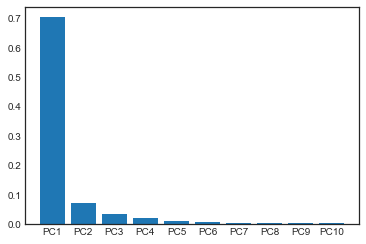

In [67]:
variation = []
plt.bar(pc,pca.explained_variance_ratio_)

In [136]:
pca

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#

In [86]:
PC_data['PC1'].min()

-0.12560047853157472

In [89]:
PC_data['PC1'].to_frame().to_csv('PC1.txt',sep='\t')

,PC1
HCB001,0.092816
HCB002,0.095038
HCB003,0.094337
HCM001,0.097955
HCM002,0.095741
...,...
RATB045,0.104084
RATB046,0.104104
RATB048,0.104223
RATB054,0.107791


In [91]:
PC_data['PC1'].to_frame().sort_values(by='PC1').to_csv('PC1_sample.txt',sep='\t')
PC_data['PC2'].to_frame().sort_values(by='PC2').to_csv('PC2_sample.txt',sep='\t')
PC_data['PC3'].to_frame().sort_values(by='PC3').to_csv('PC3_sample.txt',sep='\t')